# Explore here

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importar y leer los datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#dimensiones de los datos
df.shape

(48895, 16)

In [ ]:
#informacion de los dastos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#conteo y posible eliminacion de duplicados
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop(["id","name","host_name","last_review","reviews_per_month"],axis=1,inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


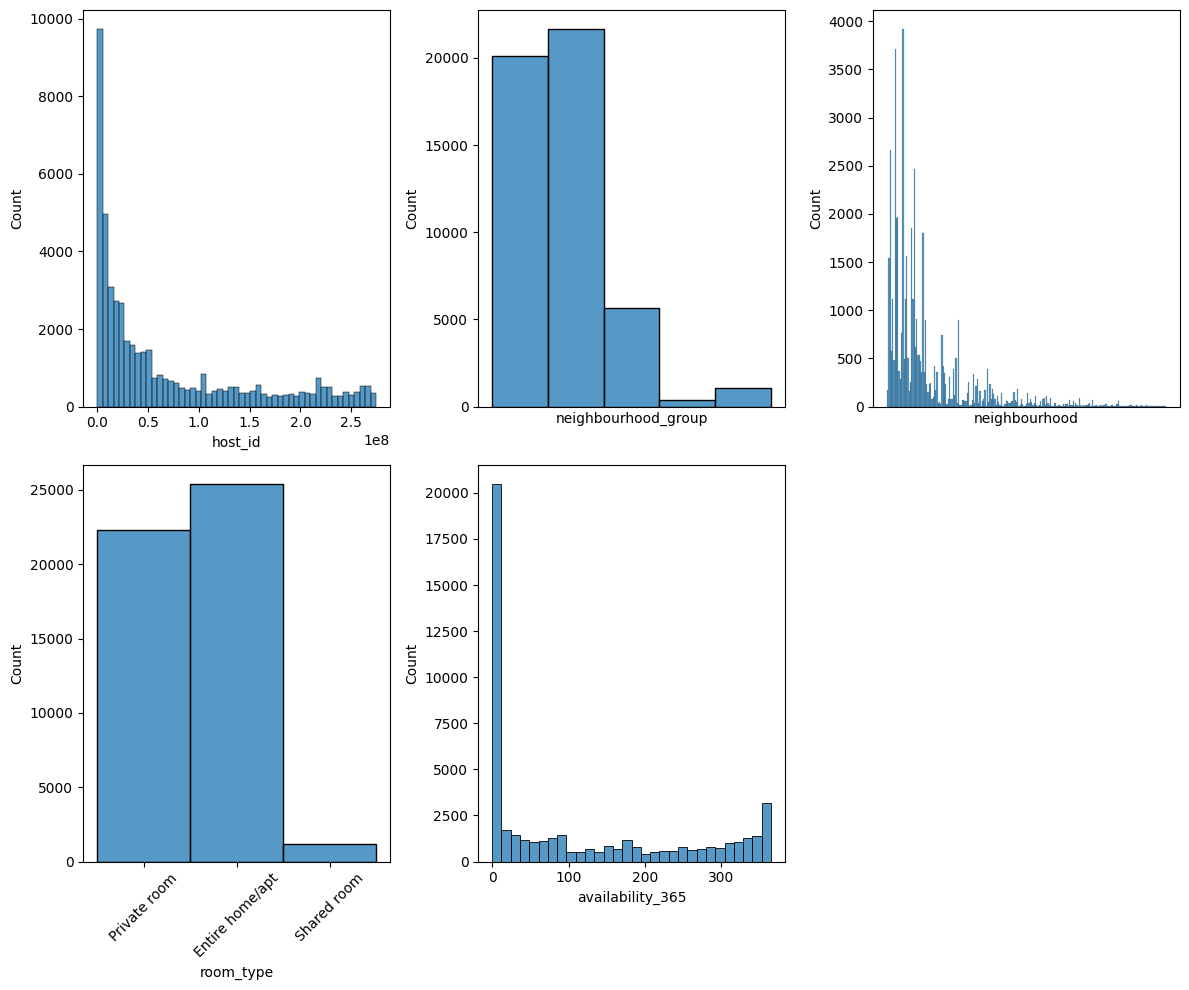

In [ ]:
#Visualizacion datos categoricos
fig, axis = plt.subplots(2, 3, figsize=(12, 10))

sns.histplot(ax = axis[0,0], data = df, x = "host_id")
sns.histplot(ax = axis[0,1], data = df, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = df, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = "room_type")
axis[1,0].tick_params(axis='x', rotation=45)
sns.histplot(ax = axis[1,1], data = df, x = "availability_365")
fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()

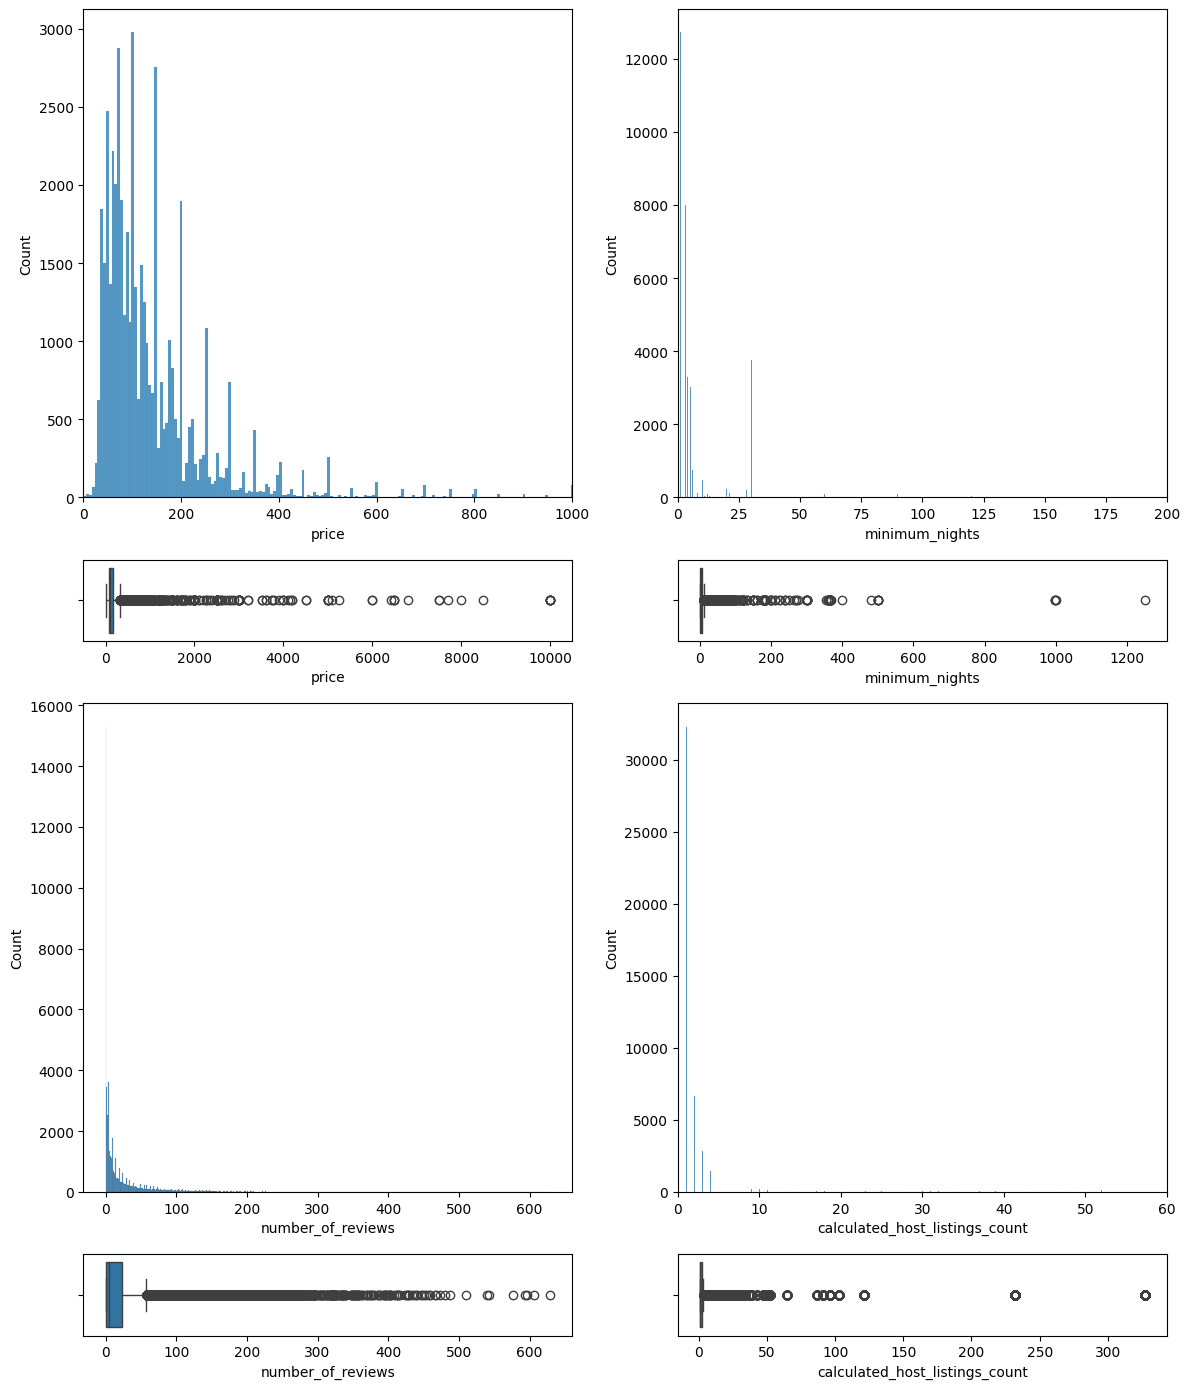

In [ ]:
#Visualizacion datos numericos
fig, axis = plt.subplots(4, 2, figsize = (12, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price").set_xlim(0, 1000)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count").set_xlim(0, 60)
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

plt.tight_layout()
plt.show()

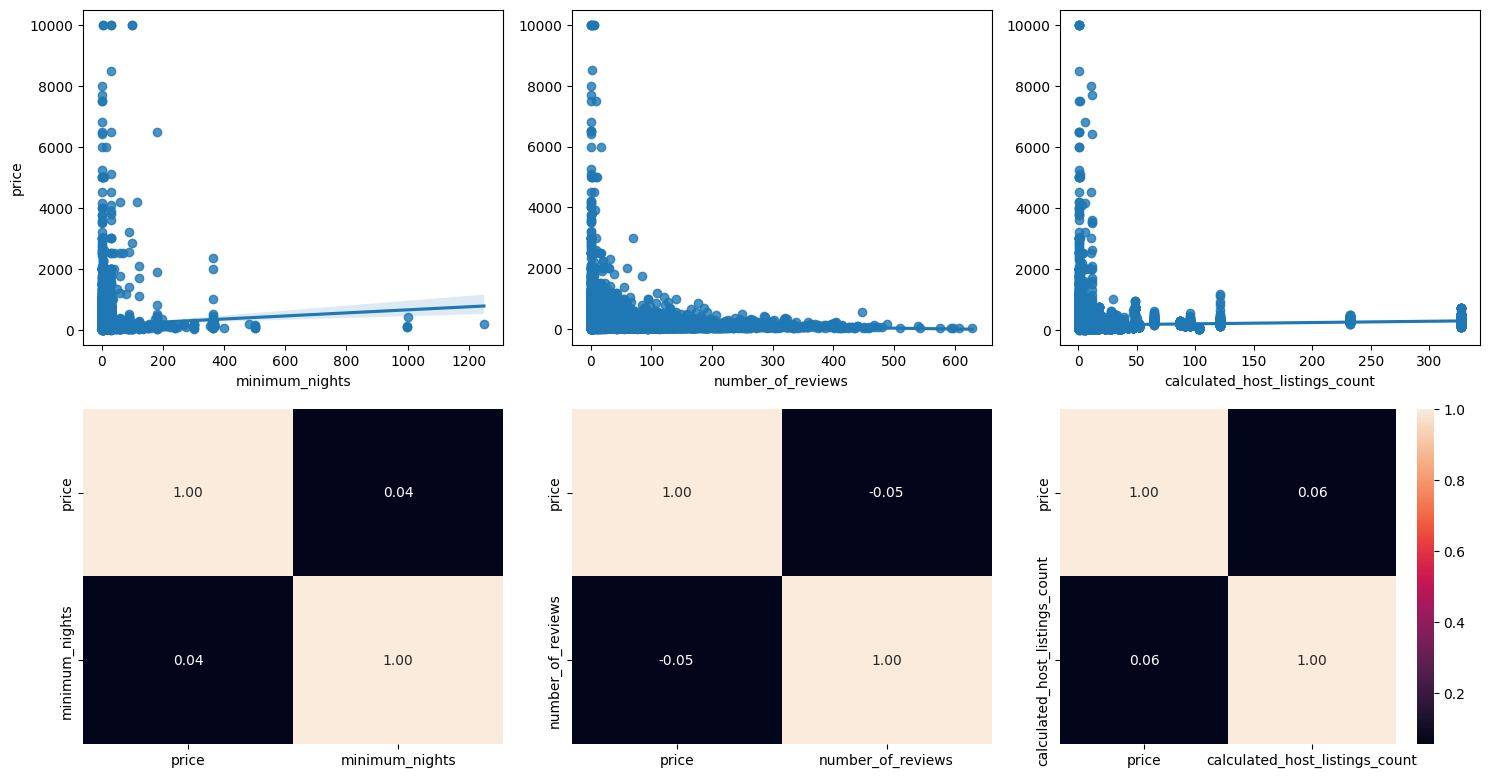

In [ ]:
#Analisis entre parametros numericos
fig, axis = plt.subplots(2, 3, figsize = (15, 8))

sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()
plt.show()

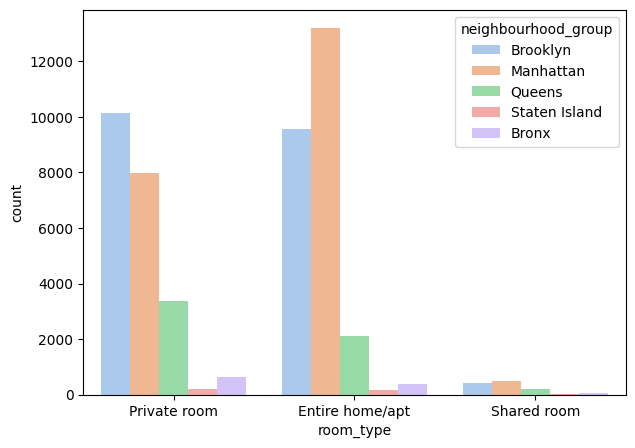

In [ ]:
#Analisis entre parametros categoricos
fig, axis = plt.subplots(figsize = (7, 5))

sns.countplot(data = df, x = "room_type", palette="pastel", hue = "neighbourhood_group")
plt.show()

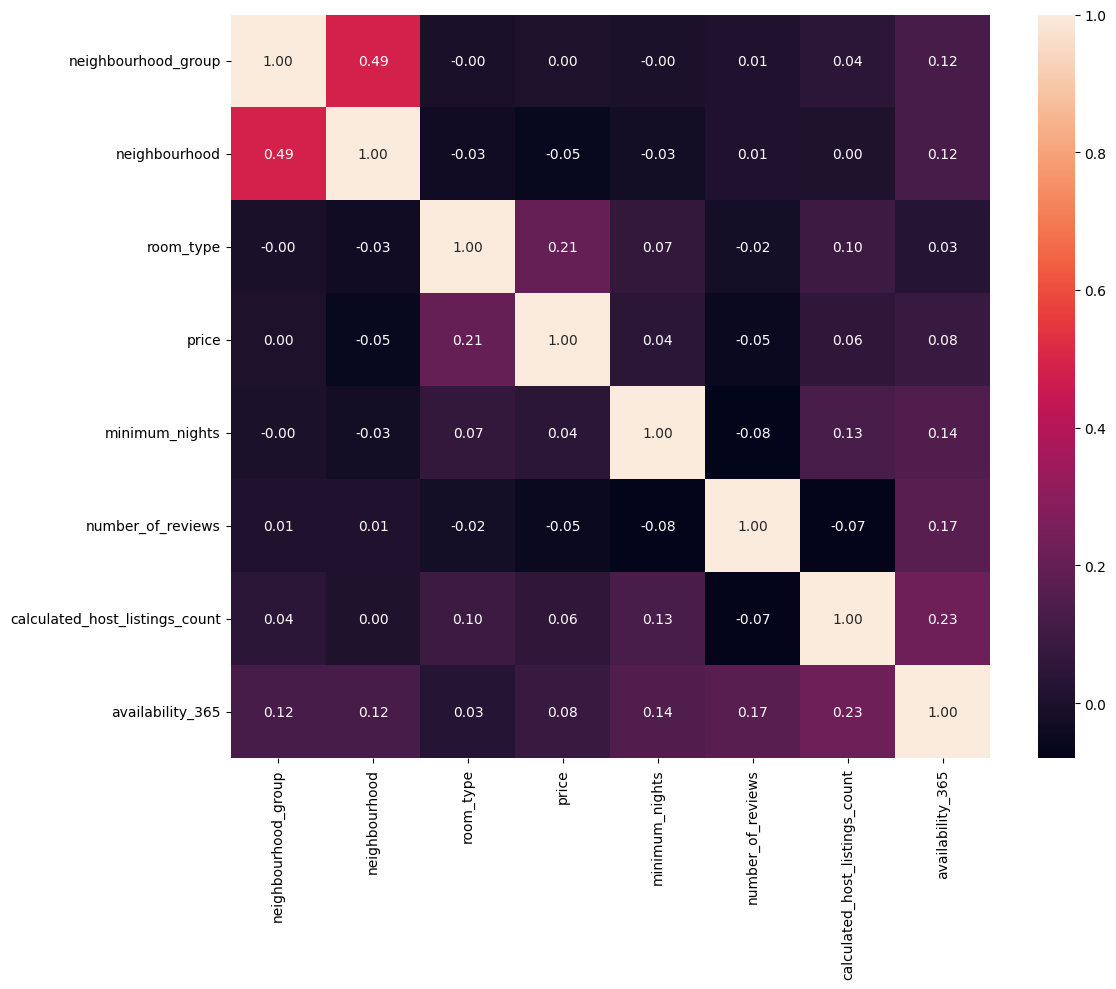

In [28]:
#Analisis entre parametros numericos y categoricos
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(12, 10))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	"number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [29]:
#Buscando valores atipicos
df.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


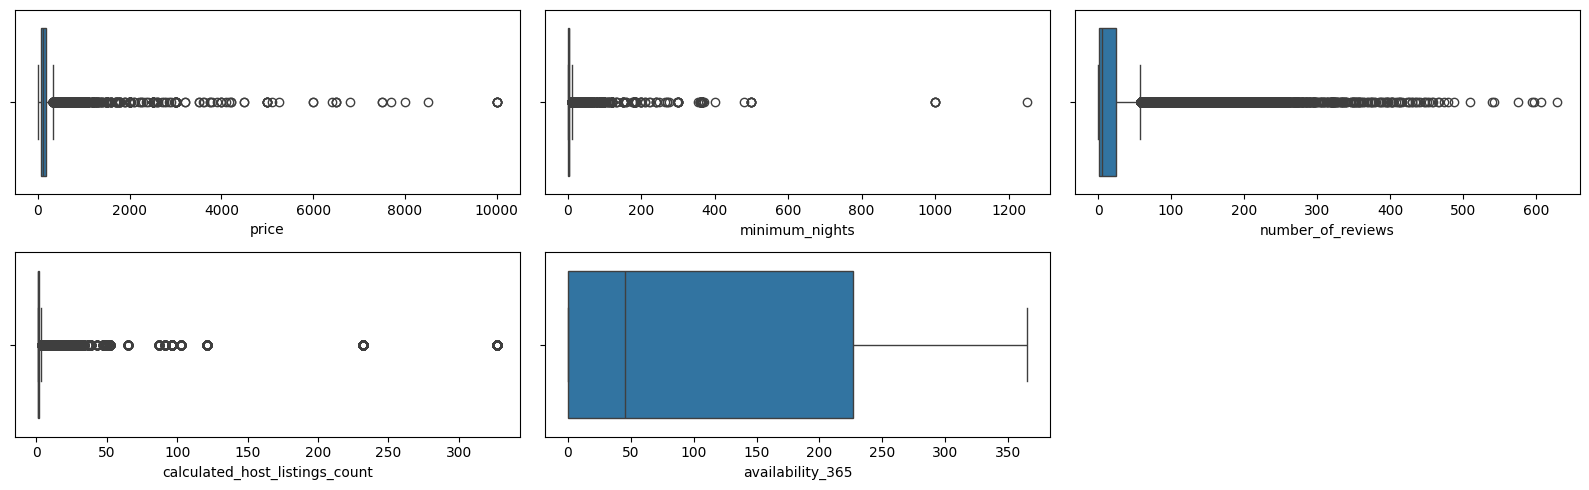

In [39]:
#Visualizando posibles valores atipicos
fig, axis = plt.subplots(2, 3, figsize = (16, 5))

sns.boxplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[0, 1], data = df, x = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = df, x = "availability_365")
fig.delaxes(axis[1,2])

plt.tight_layout()
plt.show()

In [47]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
price_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * price_IQR
lower_limit = Q1 - 1.5 * price_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_IQR, 2)}")



Los límites superior e inferior para la búsqueda de valores atipicos son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [ ]:
df[df['price']>334].shape

2972

In [ ]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
minimum_nights_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * minimum_nights_IQR
lower_limit = Q1 - 1.5 * minimum_nights_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(minimum_nights_IQR, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [50]:
df[df['minimum_nights']>14].shape

(5900, 11)

In [ ]:
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
number_of_reviews_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * number_of_reviews_IQR
lower_limit = Q1 - 1.5 * number_of_reviews_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(number_of_reviews_IQR, 2)}")

The upper and lower limits for finding outliers are 58.5 and -33.5, with an interquartile range of 23.0


In [56]:
df[df['number_of_reviews']>59].shape

(5890, 11)

In [60]:
Q1 = df['calculated_host_listings_count'].quantile(0.25)
Q3 = df['calculated_host_listings_count'].quantile(0.75)
calculated_host_listings_count_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * calculated_host_listings_count_IQR
lower_limit = Q1 - 1.5 * calculated_host_listings_count_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(calculated_host_listings_count_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [59]:
df[df['calculated_host_listings_count']>5].shape

(4796, 11)